# Linear Regression : Assignment (Geely Auto)

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importing packages for linear regression 

In [3]:
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Reading the data

In [4]:
carDetails = pd.read_csv(r"C:/Users/engel/Desktop/UpGrad/Linear_reg/CarPrice_Assignment.csv")

In [5]:
carDetails.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
carDetails.shape

(205, 26)

In [9]:
carDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
carDetails.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# percentage of missing values in each column
round(carDetails.isnull().sum()/len(carDetails.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [12]:
# Dropping Duplicates
carDetails=carDetails.drop_duplicates()

In [13]:
# drop the car_ID variable which is not relevent for the price modeling
carDetails.drop('car_ID',axis=1,inplace=True)

In [14]:
carDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

Text(0, 0.5, 'price')

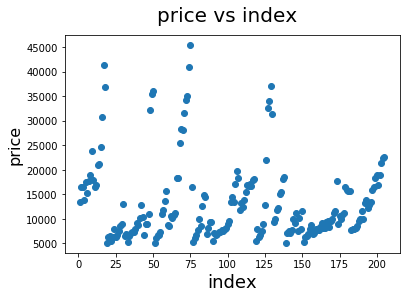

In [15]:
# Plotting price 
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.scatter(c,carDetails['price'])
fig.suptitle('price vs index', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                          # X-label
plt.ylabel('price', fontsize=16)

In [16]:
carDetails["CarName"] = carDetails["CarName"].str.replace('-', ' ')
carDetails.CarName.unique()

carDetails["CarName"] = carDetails.CarName.map(lambda x: x.split(" ", 1)[0])
# As we have some redundant data in carName lets fix it 
carDetails.CarName = carDetails['CarName'].str.lower()
carDetails['CarName'] = carDetails['CarName'].str.replace('vw','volkswagen')
carDetails['CarName'] = carDetails['CarName'].str.replace('vokswagen','volkswagen')
carDetails['CarName'] = carDetails['CarName'].str.replace('toyouta','toyota')
carDetails['CarName'] = carDetails['CarName'].str.replace('porcshce','porsche')
carDetails['CarName'] = carDetails['CarName'].str.replace('maxda','mazda')
carDetails['CarName'] = carDetails['CarName'].str.replace('maxda','mazda')

carDetails.CarName.unique()
# carDetails.info()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
# Converting Yes to 1 and No to 0
carDetails['fueltype'] = carDetails['fueltype'].map({'gas': 1, 'diesel': 0})
carDetails['aspiration'] = carDetails['aspiration'].map({'std': 1, 'turbo': 0})
carDetails['doornumber'] = carDetails['doornumber'].map({'two': 1, 'four': 0})
carDetails['enginelocation'] = carDetails['enginelocation'].map({'front': 1, 'rear': 0})

In [19]:
df = pd.get_dummies(carDetails)
df.head()
# df.info()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#defining a normalisation function 
cols_to_norm = ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']
# Normalising only the numeric fields 
normalised_df = df[cols_to_norm].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_df.head()

df['symboling'] = normalised_df['symboling']
df['carlength'] = normalised_df['carlength']
df['carheight'] = normalised_df['carheight']
df['enginesize'] = normalised_df['enginesize']
df['boreratio'] = normalised_df['boreratio']
df['stroke'] = normalised_df['stroke']
df['price'] = normalised_df['price']
df['compressionratio'] = normalised_df['compressionratio']
df['horsepower'] = normalised_df['horsepower']
df['peakrpm']= normalised_df['peakrpm']
df['citympg'] = normalised_df['citympg']
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,94.5,-0.042526,65.5,-0.110407,2823,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,99.8,0.038071,66.2,0.047927,2337,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,99.4,0.038071,66.4,0.047927,2824,...,0,0,0,0,0,0,0,1,0,0


In [21]:
refinedcol = df.columns
refinedcol

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_alfa',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginety

In [22]:
# Putting feature variable to X
# df.info()
# df.columns
X = df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

# # # Putting response variable to y
y = df['price']

In [24]:
#random_state is the seed used by the random number generator, it can be any integer.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

RFE

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False  True False  True  True  True False False
 False False False  True  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False]
[49 47  5 24 43  1 16  1  1  1 48 32  4 50 15  1  1  1 22 17 27 29 18 38
 46  6 31  2 14  1 30 10 39 44 33 11  9 36 35 34 37 42 41 25  8  1  3 13
 21  7  1  1 12  1 23  1  1  1 19 28 45 26 51 40 20 52]


In [26]:
X_train.columns[rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [27]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_s

In [28]:
print("Before droping of columns")
X_train.columns
X_train1 = X_train.drop(col,1)
print("After Droping of columns")
X_train1.columns

df.head()

Before droping of columns
After Droping of columns


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,94.5,-0.042526,65.5,-0.110407,2823,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,99.8,0.038071,66.2,0.047927,2337,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,99.4,0.038071,66.4,0.047927,2824,...,0,0,0,0,0,0,0,1,0,0


Building Model By droping columns after RFE

In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)

In [30]:
lm_1 = sm.OLS(y_train,X_train1).fit() # Running the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        19:01:10   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [31]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [32]:
df.drop(col, axis =1, inplace = True)


In [33]:
# Calculating Vif value
df.head()
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
18,cylindernumber_two,inf
13,enginetype_rotor,inf
2,carwidth,1797.06
0,wheelbase,1582.75
3,curbweight,378.04
7,highwaympg,85.05
15,cylindernumber_four,36.60
4,enginesize,23.44
1,carlength,6.48
14,cylindernumber_eight,5.46


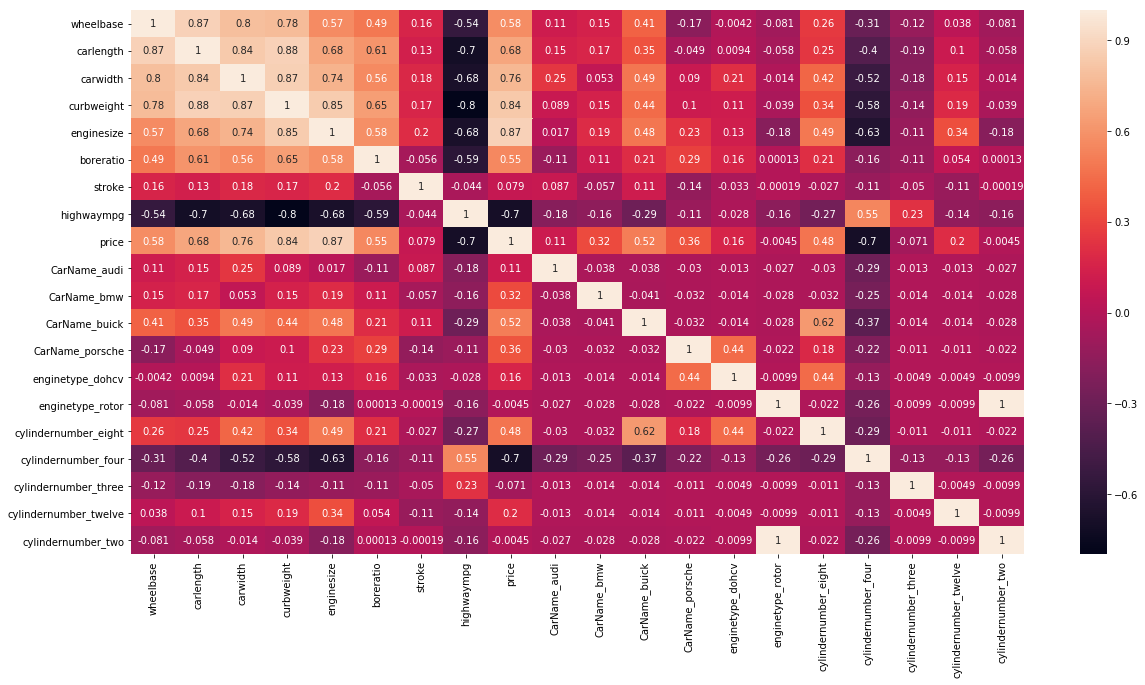

In [34]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [35]:
# Dropping highly correlated variables and insignificant variables
X_train2 = X_train1.drop('enginetype_rotor', 1)

In [36]:
# Creating a second fitted model
lm_2 = sm.OLS(y_train,X_train2).fit()

In [37]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        19:02:30   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [38]:
df.drop('enginetype_rotor', axis =1, inplace = True)

In [39]:
# Calculating Vif value
vif_cal(input_data= df, dependent_col="price")

,Var,Vif
2,carwidth,1797.06
0,wheelbase,1582.75
3,curbweight,378.04
7,highwaympg,85.05
14,cylindernumber_four,36.60
4,enginesize,23.44
1,carlength,6.48
13,cylindernumber_eight,5.46
5,boreratio,4.49
17,cylindernumber_two,3.42


In [40]:
# Dropping highly correlated variables and insignificant variables
X_train3 = X_train2.drop('cylindernumber_eight', 1)

In [41]:
# Creating a third fitted model 
lm_3 = sm.OLS(y_train,X_train3).fit()

In [42]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.52
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.50e-60
Time:                        19:03:19   Log-Likelihood:                 203.22
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     129   BIC:                            -337.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [43]:
df.drop('cylindernumber_eight', axis =1, inplace = True)

In [44]:
# Dropping highly correlated variables and insignificant variables 

X_train4 = X_train3.drop('enginetype_dohcv', 1)

In [45]:
# Creating a fourth fitted model
lm_4 = sm.OLS(y_train,X_train4).fit()

In [46]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.37e-61
Time:                        19:04:18   Log-Likelihood:                 203.21
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     130   BIC:                            -341.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [47]:
df.drop('enginetype_dohcv', axis =1, inplace = True)

In [48]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
2,carwidth,1778.92
0,wheelbase,1569.81
3,curbweight,337.76
7,highwaympg,82.95
12,cylindernumber_four,25.24
4,enginesize,11.32
1,carlength,6.46
5,boreratio,3.44
15,cylindernumber_two,2.46
8,CarName_audi,1.71


In [49]:
# Dropping highly correlated variables and insignificant variables
X_train5 = X_train4.drop('cylindernumber_four', 1)

In [50]:
# Creating a fifth fitted model
lm_5 = sm.OLS(y_train,X_train5).fit()

In [51]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.44e-61
Time:                        19:04:51   Log-Likelihood:                 200.15
No. Observations:                 143   AIC:                            -376.3
Df Residuals:                     131   BIC:                            -340.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [52]:
df.drop('cylindernumber_four', axis =1, inplace = True)

In [53]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
2,carwidth,1770.08
0,wheelbase,1544.85
3,curbweight,325.00
7,highwaympg,82.82
4,enginesize,7.35
1,carlength,6.46
5,boreratio,2.32
10,CarName_buick,1.67
11,CarName_porsche,1.63
13,cylindernumber_twelve,1.53


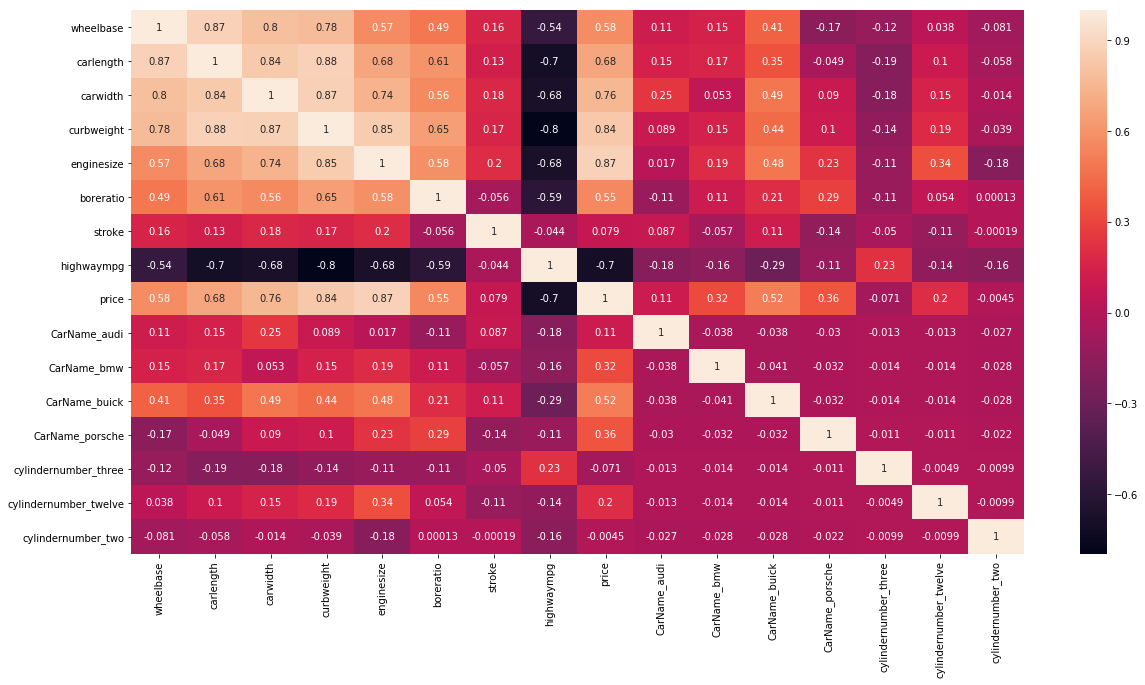

In [55]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [56]:
# Dropping highly correlated variables and insignificant variables
X_train6 = X_train5.drop('cylindernumber_twelve', 1)

In [57]:
# Creating a sixth fitted model
lm_6 = sm.OLS(y_train,X_train6).fit()

In [58]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.52e-62
Time:                        19:05:41   Log-Likelihood:                 199.01
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     132   BIC:                            -343.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0296 

In [59]:
df.drop('cylindernumber_twelve', axis =1, inplace = True)

In [61]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
2,carwidth,1760.62
0,wheelbase,1535.33
3,curbweight,324.30
7,highwaympg,81.65
1,carlength,6.46
4,enginesize,5.58
5,boreratio,2.26
11,CarName_porsche,1.52
10,CarName_buick,1.50
13,cylindernumber_two,1.36


In [62]:
# Dropping highly correlated variables and insignificant variables
X_train7 = X_train6.drop('stroke', 1)

In [63]:
# Creating a seventh fitted model
lm_7 = sm.OLS(y_train,X_train7).fit()

In [64]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.71e-62
Time:                        19:06:22   Log-Likelihood:                 198.05
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     133   BIC:                            -346.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0295 

In [65]:
df.drop('stroke', axis =1, inplace = True)

In [66]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
2,carwidth,1747.08
0,wheelbase,1533.89
3,curbweight,323.08
6,highwaympg,79.50
1,carlength,6.46
4,enginesize,5.26
5,boreratio,2.22
9,CarName_buick,1.50
10,CarName_porsche,1.49
7,CarName_audi,1.34


In [67]:
# Dropping highly correlated variables and insignificant variables
X_train8 = X_train7.drop('boreratio', 1)

In [68]:
# Creating a eighth fitted model
lm_8 = sm.OLS(y_train,X_train8).fit()

In [69]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.47e-63
Time:                        19:07:11   Log-Likelihood:                 197.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     134   BIC:                            -349.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0290 

In [70]:
df.drop('boreratio', axis =1, inplace = True)

In [71]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")


,Var,Vif
2,carwidth,1746.49
0,wheelbase,1533.62
3,curbweight,322.90
5,highwaympg,76.58
1,carlength,6.14
4,enginesize,5.25
8,CarName_buick,1.48
9,CarName_porsche,1.35
11,cylindernumber_two,1.34
6,CarName_audi,1.23


In [72]:
# Dropping highly correlated variables and insignificant variables
X_train9 = X_train8.drop('cylindernumber_three', 1)

In [73]:
# Creating a ninth fitted model
lm_9 = sm.OLS(y_train,X_train9).fit()

In [74]:
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.32e-63
Time:                        19:08:26   Log-Likelihood:                 195.27
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     135   BIC:                            -350.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0284      0

In [75]:
df.drop('cylindernumber_three', axis =1, inplace = True)

In [76]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
2,carwidth,1693.55
0,wheelbase,1522.76
3,curbweight,317.24
5,highwaympg,73.63
1,carlength,5.99
4,enginesize,5.25
8,CarName_buick,1.48
9,CarName_porsche,1.35
10,cylindernumber_two,1.33
6,CarName_audi,1.21


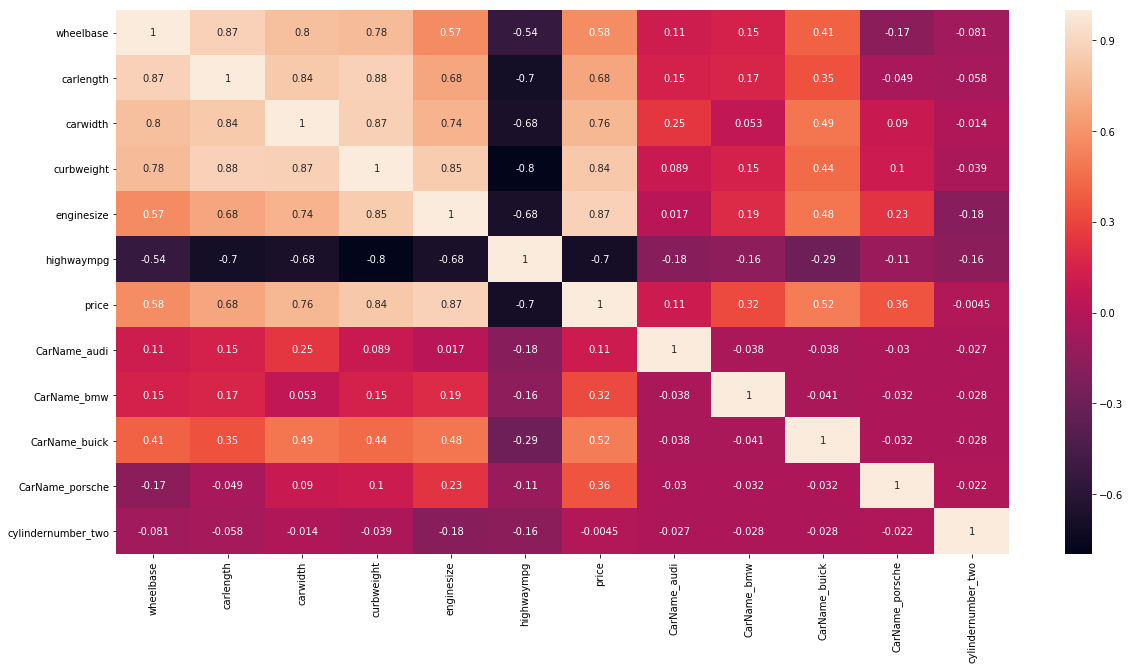

In [77]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

PREDICTION & MODEL EVALUATION


In [81]:
# Adding  constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test)


In [84]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12
X_test_m9 = X_test_m9.drop(col, axis=1)
X_test_m9 = X_test_m9.drop(['cylindernumber_three','enginetype_rotor','cylindernumber_eight',
                              'enginetype_dohcv','cylindernumber_four','cylindernumber_twelve','stroke','boreratio'], axis=1)
X_test_m9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 8 columns):
const                 62 non-null float64
carlength             62 non-null float64
enginesize            62 non-null float64
CarName_audi          62 non-null uint8
CarName_bmw           62 non-null uint8
CarName_buick         62 non-null uint8
CarName_porsche       62 non-null uint8
cylindernumber_two    62 non-null uint8
dtypes: float64(3), uint8(5)
memory usage: 2.2 KB


In [85]:
# Making predictions
y_pred_m9 = lm_9.predict(X_test_m9)
y_pred_m9 

160   -0.134153
186   -0.086880
59    -0.031819
165   -0.127273
140   -0.131046
64    -0.031819
198    0.022834
75     0.021928
172    0.032964
104    0.118363
200    0.054629
136   -0.009486
111   -0.012089
41    -0.073384
73     0.782494
31    -0.213696
156   -0.134153
133   -0.009486
65     0.012182
83     0.053269
195    0.054629
197    0.054629
126    0.420286
118   -0.183074
167    0.032964
101    0.149894
124    0.053269
69     0.362145
11     0.135798
46    -0.055396
         ...   
110    0.115374
201    0.054629
115   -0.012089
174   -0.072810
134   -0.009486
169    0.032964
92    -0.139910
173   -0.038126
74     0.745421
3      0.035863
157   -0.134153
81    -0.045578
32    -0.235793
99    -0.050212
26    -0.183074
88    -0.081983
184   -0.121565
187   -0.121565
52    -0.175024
168    0.032964
164   -0.127273
188   -0.086880
7      0.160053
158   -0.099468
123   -0.040992
28    -0.040992
29     0.053269
182   -0.121565
40    -0.073384
128    0.420286
Length: 62, dtype: float

Text(0, 0.5, 'Car Price')

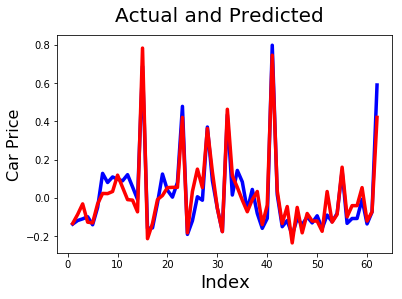

In [86]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m9, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Text(0, 0.5, 'y_pred')

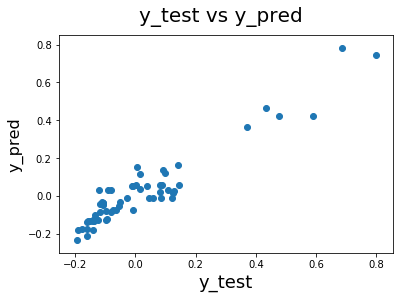

In [87]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

Assessing the model

Text(0, 0.5, 'ytest-ypred')

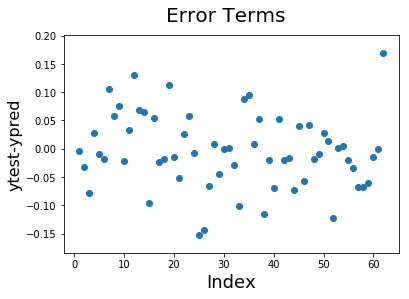

In [88]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred_m9)

fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('ytest-ypred', fontsize=16)  

Text(0, 0.5, 'Index')

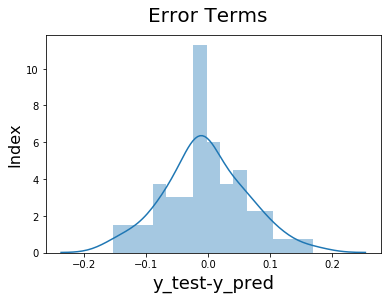

In [89]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m9),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)   

In [90]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m9)))

RMSE : 0.06519190461262166
